In [1]:
from pandas import DataFrame
import requests
import json
import base64
import pandas as pd
import io

In [2]:
url = "https://pb.utfpr.edu.br/geppadem/alimentario/index.php/admin/remotecontrol"

payload = {
    "method": "get_session_key",
    "params": ["ppgdr-pb@utfpr.edu.br", "5MnVpxad273a"],
    "id": 1
}
headers = {
    "cookie": "LS-BFZSAEVMKCPRBIUK=ehvcotsuvgjkoff0n91nn2m3um",
    "Content-Type": "application/json",
    "User-Agent": "Apache-HttpClient/4.2.2 (java 1.5)"
}

response = requests.request("POST", url, json=payload, headers=headers, verify=False)


c:\Users\pedro\.conda\envs\python39\lib\site-packages\urllib3\connectionpool.py:1095: InsecureRequestWarning: Unverified HTTPS request is being made to host 'pb.utfpr.edu.br'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


In [3]:
json_data = json.loads(response.text)

In [4]:
key = json_data["result"]
key

'5frdOuKpgLxzkxnxhV0rMiLFbkSeohBB'

In [5]:
import requests

url = "https://pb.utfpr.edu.br/geppadem/alimentario/index.php/admin/remotecontrol"

payload = {
    "method": "export_responses",
    "params": [key, "572115", "csv", None, "complete", "full", "long"],
    "id": 1
}
headers = {
    "cookie": "LS-BFZSAEVMKCPRBIUK=ehvcotsuvgjkoff0n91nn2m3um",
    "Content-Type": "application/json",
    "User-Agent": "insomnia/2023.5.8"
}

responseSurvey = requests.request("POST", url, json=payload, headers=headers, verify=False)



c:\Users\pedro\.conda\envs\python39\lib\site-packages\urllib3\connectionpool.py:1095: InsecureRequestWarning: Unverified HTTPS request is being made to host 'pb.utfpr.edu.br'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


In [6]:
json_data = json.loads(responseSurvey.text)

In [7]:
survey = json_data["result"]

surveyDecode = base64.b64decode(survey).decode("utf-8")

In [8]:
df = pd.read_csv(io.StringIO(surveyDecode), sep=";")
df

,ID da resposta,Data de envio,Última página,Idioma inicial,Semente,01. Nome do Entrevistado,02. Área da Terra,03. Localidade,04. Município/Estado,05. Telefone,...,45. Como é realizada a comunicação com os compradores/consumidores nos mercados digitais? [Por meio de aplicativos de mensagens (ex. WhatsApp)],45. Como é realizada a comunicação com os compradores/consumidores nos mercados digitais? [Outros],"46. Para você, quais pontos deveriam ser melhorados nos mercados digitais? [Instabilidade na oferta dos alimentos e produtos]","46. Para você, quais pontos deveriam ser melhorados nos mercados digitais? [Logística e entrega dos alimentos e produtos]","46. Para você, quais pontos deveriam ser melhorados nos mercados digitais? [Alimento entregue fora do padrão de qualidade ofertado na plataforma/site]","46. Para você, quais pontos deveriam ser melhorados nos mercados digitais? [Com o pagamento do pedido dos alimentos]","46. Para você, quais pontos deveriam ser melhorados nos mercados digitais? [Não conhecimento da origem dos alimentos e dos agricultores]","46. Para você, quais pontos deveriam ser melhorados nos mercados digitais? [Outros]","47. De zero a dez, que nota daria para a importância que as tecnologias digitais tem na comercialização da UP?","49. De zero a dez, que nota daria para a importância que as tecnologias digitais tem para o futuro da UP?"
0,67,2023-09-07 14:45:29,1,pt-BR,NaN,Maria Léia Borges dos Reis,4.0,Buritizal dos Reis,Morros- Maranhão,9889090098,...,Sim,NaN,NaN,Sim,NaN,NaN,NaN,Maior interesse do poder público estimular ess...,10,10
1,68,2023-09-08 07:25:19,1,pt-BR,NaN,Elinete Sales da Silva,0.5,Patizal,Morros,98984763823,...,Sim,É a associação que gere o mercado que faz a co...,NaN,NaN,NaN,NaN,NaN,Aumentar os preços de comercialização,10,10
2,103,2023-10-06 12:04:35,1,pt-BR,NaN,Jaci,1.0,Comunidade quilombola engenho de São João,São Felix,7581834294,...,Sim,NaN,NaN,NaN,NaN,NaN,NaN,Não há o que melhorar,10,10
3,104,2023-10-06 12:24:41,1,pt-BR,NaN,Josue,0.5,Sapucaia,"Cruz das Almas, Bahia",75983016010,...,Sim,NaN,NaN,NaN,NaN,NaN,NaN,Não há sugestões,10,10
4,126,2023-11-08 10:57:27,1,pt-BR,NaN,Perpetua,10.0,Serra da Besta,Uaua,74999713409,...,NaN,Realizada pelos gestores da Escoaf,NaN,NaN,NaN,NaN,NaN,Agricultora não sabe informar pois a cooperati...,7,7
5,129,2023-11-08 11:13:24,1,pt-BR,NaN,João Gonçalves de Almeida,1.0,Comunidade Serra da Besta,Uaua-Bahia,(74)999082291,...,Sim,NaN,NaN,NaN,NaN,Sim,NaN,Aumentar a quantidade dos produtos,8,8
6,131,2023-11-08 12:22:37,1,pt-BR,NaN,José Wilson Mora Matos,7.0,Comunidade Escondido,Uaua-Bahia,Xxxxxx,...,NaN,NaN,NaN,Sim,NaN,NaN,NaN,NaN,X,X
7,132,2023-11-08 13:09:05,1,pt-BR,NaN,Conceição,60.0,Fazenda Escondido,Uaua/bahia,7439404025,...,Sim,NaN,NaN,Sim,NaN,NaN,NaN,NaN,10,10
8,133,2023-11-08 15:13:19,1,pt-BR,NaN,Edineide,3.0,Fazenda cerra Grande,Curaca/ bahia,74999574555,...,Sim,NaN,NaN,Sim,NaN,NaN,NaN,NaN,10,10
9,134,2023-11-08 15:18:20,1,pt-BR,NaN,Edneusa Gonçalves Sena,3.0,Serra Grande,Curaçá- BA,(74)999846833,...,Sim,NaN,NaN,NaN,NaN,NaN,NaN,Xxxxxxx,8,8


In [14]:
df.columns

Index(['ID da resposta', 'Data de envio', 'Última página', 'Idioma inicial',
       'Semente', '01. Nome do Entrevistado', '02. Área da Terra ',
       '03. Localidade', '04. Município/Estado', '05. Telefone',
       ...
       '45. Como é realizada a comunicação com os compradores/consumidores nos mercados digitais? [Por meio de aplicativos de mensagens (ex. WhatsApp)]',
       '45. Como é realizada a comunicação com os compradores/consumidores nos mercados digitais? [Outros]',
       '46. Para você, quais pontos deveriam ser melhorados nos mercados digitais? [Instabilidade na oferta dos alimentos e produtos]',
       '46. Para você, quais pontos deveriam ser melhorados nos mercados digitais? [Logística e entrega dos alimentos e produtos]',
       '46. Para você, quais pontos deveriam ser melhorados nos mercados digitais? [Alimento entregue fora do padrão de qualidade ofertado na plataforma/site]',
       '46. Para você, quais pontos deveriam ser melhorados nos mercados digitais? [Com

In [17]:
df['01. Nome do Entrevistado']

0             Maria Léia Borges dos Reis
1                 Elinete Sales da Silva
2                                   Jaci
3                                  Josue
4                               Perpetua
5             João Gonçalves de Almeida 
6                 José Wilson Mora Matos
7                             Conceição 
8                               Edineide
9                Edneusa Gonçalves Sena 
10                               Ernesto
11                             Edimilson
12            Timóteo Pereira Gonçalves 
13            Ruan conceição dos Santos 
14                   Giomar Neves Lopes 
15            Eliane Maria da Conceição 
16      Maria de Fátima da Silva Soares 
17             Maria José da Silva Elias
18       Ivondeide Alves da Silva Elias 
19     Antônia Ozanete de Lima Oliveira 
20              Ester Samara Lopes Lima 
21          Rosângela María de Oliveira 
22    Francisca Francedir Amorim França 
23         Thiago José Souza de Freitas 
24         Maria

<AxesSubplot:>

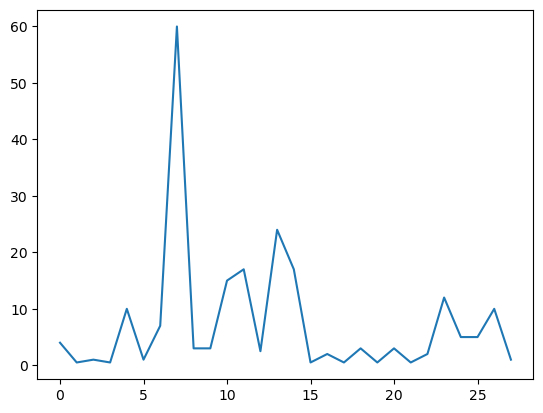

In [20]:
df['02. Área da Terra\xa0'].plot()

In [21]:
df['03. Localidade']

0                                    Buritizal dos Reis
1                                               Patizal
2            Comunidade quilombola engenho de São João 
3                                              Sapucaia
4                                        Serra da Besta
5                             Comunidade Serra da Besta
6                                 Comunidade Escondido 
7                                     Fazenda Escondido
8                                  Fazenda cerra Grande
9                                         Serra Grande 
10                                          Juazeirinho
11                                         Serra Grande
12                                  Fazenda Baixa Funda
13                                   Povoado Risca Faca
14                                 Assentamento Boa Fé 
15    Projeto de assentamento de reforma Agrária Mul...
16                          Assentamento Mulungunzinho 
17                          Assentamento Mulungu

In [22]:
df['04. Município/Estado']

0              Morros- Maranhão 
1                         Morros
2                      São Felix
3          Cruz das Almas, Bahia
4                           Uaua
5                    Uaua-Bahia 
6                     Uaua-Bahia
7                     Uaua/bahia
8                  Curaca/ bahia
9                     Curaçá- BA
10                      Uaua/ Ba
11                    Curaca/ Ba
12                      Uaua- BA
13                    Canudos-BA
14                    Mossoró-RN
15         Município de Mossoró 
16                   Mossoró RN 
17                   Mossoró-RN 
18                   Mossoró RN 
19                   Mossoró-RN 
20                   Mossoró RN 
21                      Mossoró 
22    Governador Dixcept Rosado 
23                   Mossoró RN 
24                   Mossoró-RN 
25                    Mossoró RN
26                    Caruaru-PE
27                        Bonito
Name: 04. Município/Estado, dtype: object

In [23]:
df['05. Telefone']

0        9889090098
1       98984763823
2        7581834294
3       75983016010
4       74999713409
5     (74)999082291
6            Xxxxxx
7        7439404025
8       74999574555
9     (74)999846833
10      74999496392
11      74999572363
12    (74)999891923
13     (74)91964347
14    (84)999601892
15     (84)96818418
16     (84)92185652
17    (84)999507066
18      84991819175
19     (84)87188692
20     (84)96866440
21     (84)91025192
22    (84)999850529
23     (84)96786099
24       8498327633
25        996063393
26       8193182435
27       8199622783
Name: 05. Telefone, dtype: object

In [24]:
df['06. Data da Coleta']

0     2023-09-07 14:03:34
1     2023-09-08 06:52:29
2     2023-10-06 11:44:53
3     2023-10-06 12:10:26
4     2023-11-08 10:18:38
5     2023-11-08 10:10:18
6     2023-11-08 11:43:13
7     2023-11-08 12:43:30
8     2023-11-08 14:50:38
9     2023-11-08 14:43:04
10    2023-11-08 15:47:54
11    2023-11-08 17:07:09
12    2023-11-08 16:06:23
13    2023-11-09 10:47:13
14    2023-11-13 09:14:47
15    2023-11-13 11:21:04
16    2023-11-13 12:53:59
17    2023-11-13 13:57:23
18    2023-11-13 14:07:02
19    2023-11-13 14:47:53
20    2023-11-14 09:47:31
21    2023-11-14 15:29:51
22    2023-11-16 09:53:12
23    2023-11-16 15:34:15
24    2023-11-17 09:16:21
25    2023-11-14 16:09:08
26    2023-11-28 15:37:32
27    2023-11-28 19:50:29
Name: 06. Data da Coleta, dtype: object

In [25]:
df['07. Distância da UP até a sede do município (em Km)']

0     20 km
1        28
2        12
3         3
4        26
5     25km 
6     35 km
7        27
8       100
9     28 km
10       24
11       98
12       24
13     50km
14    15km 
15     35km
16       25
17       25
18       25
19       25
20     13km
21       25
22     18km
23      6km
24       25
25       25
26     10km
27      9km
Name: 07. Distância da UP até a sede do município (em Km), dtype: object

In [26]:
df['09. Nomes das pessoas integrantes da UP [Integrante 01]']

0                            Maria Léia 
1                                 Eliete
2                                 Marido
3                           Entrevistado
4                           Entrevistada
5             João Gonçalves de Almeida 
6                      José Wilson Mora 
7                           Entrevistada
8                           Entrevistada
9             Edneusa Gonçalves de Sena 
10                          Entrevistado
11                          Entrevistado
12            Timóteo Pereira Gonçalves 
13            Ruan conceição dos Santos 
14                   Giomar Neves Lopes 
15                               Eliane 
16                      María de Fátima 
17                           Maria José 
18         Ivoneide Alves da Silva Elias
19          Antônia Ozanete de Oliveira 
20                         Ester Samara 
21                            Rosângela 
22                            Francisca 
23                                Thiago
24              

In [16]:
df['49. De zero a dez, que nota daria para a importância que as tecnologias digitais tem para o futuro da UP?']

0                                   10
1                                   10
2                                   10
3                                   10
4                                    7
5                                    8
6                                    X
7                                   10
8                                   10
9                                    8
10                                   5
11                                   8
12                       Sem Resposta 
13                                  10
14                                  10
15                                   8
16                                  10
17    10 pois no futuro quer aprender 
18                                  10
19                                  10
20                                  10
21                                  10
22                                  10
23                                   7
24                                  10
25                       

In [9]:
df.shape

(28, 325)

In [10]:
default_columns = ["id", "submitdate", "lastpage", "Q00"] 

In [11]:
g1_df = pd.concat([df[default_columns], df.filter(like="G01")], axis=1).dropna(axis=1, how="all")
g1_df

KeyError: "None of [Index(['id', 'submitdate', 'lastpage', 'Q00'], dtype='object')] are in the [columns]"

In [ ]:
g2_df = pd.concat([df[default_columns], df.filter(like="G02")], axis=1).dropna(axis=1, how="all")
g2_df

,id,submitdate,lastpage,Q00,G02Q09[AO01],G02Q09[AO02],G02Q09[AO03],G02Q09[AO04],G02Q09[AO05],G02Q09[AO06],G02Q09[AO07],G02Q09[AO08]
0,67,2023-09-07 14:45:29,1,Maria Léia Borges dos Reis,Maria Léia,João Ribeiro dos Reis,NaN,NaN,NaN,NaN,NaN,NaN
1,68,2023-09-08 07:25:19,1,Elinete Sales da Silva,Eliete,Paulo Henrique Pereira,Adrian Henrique,Artur Gabriel,NaN,NaN,NaN,NaN
2,103,2023-10-06 12:04:35,1,Jaci,Marido,Entrevistada,Filho,NaN,NaN,NaN,NaN,NaN
3,104,2023-10-06 12:24:41,1,Josue,Entrevistado,Nora,Filho,Esposa,NaN,NaN,NaN,NaN
4,126,2023-11-08 10:57:27,1,Perpetua,Entrevistada,Esposo,Filho,NaN,NaN,NaN,NaN,NaN
5,129,2023-11-08 11:13:24,1,João Gonçalves de Almeida,João Gonçalves de Almeida,Wesle dos Santos de Almeida,NaN,NaN,NaN,NaN,NaN,NaN
6,131,2023-11-08 12:22:37,1,José Wilson Mora Matos,José Wilson Mora,Gean,José Wildson,Joelma,Antenor,NaN,NaN,NaN
7,132,2023-11-08 13:09:05,1,Conceição,Entrevistada,Esposo,Filho,Filho,NaN,NaN,NaN,NaN
8,133,2023-11-08 15:13:19,1,Edineide,Entrevistada,Esposo,Filha,Filha,Filha,NaN,NaN,NaN
9,134,2023-11-08 15:18:20,1,Edneusa Gonçalves Sena,Edneusa Gonçalves de Sena,José Ailton Alves dos Santos,Claudia Beatriz de Sena Alves,NaN,NaN,NaN,NaN,NaN


In [ ]:
g3_df = pd.concat([df[default_columns], df.filter(like="G03")], axis=1).dropna(axis=1, how="all")
g3_df

,id,submitdate,lastpage,Q00,G03Q15[SQ001],G03Q15[SQ001comment],G03Q15[SQ002],G03Q15[SQ002comment],G03Q15[SQ003],G03Q15[SQ003comment],...,G03Q16,G03Q16[comment],G03Q17,G03Q17[comment],G03Q18,G03Q18[comment],G03Q19,G03Q19[comment],G03Q20,G03Q21
0,67,2023-09-07 14:45:29,1,Maria Léia Borges dos Reis,NaN,NaN,NaN,NaN,Sim,Whatsapp,...,Sim. Especifique na caixa de comentários,Arrendamento e troca de experiências,Não,NaN,Não,NaN,Sim. Especifique na caixa de comentários,"Assistência técnica da Tijupá, especialmente n...",Sim,Agricultor familiar do Grupo Variável (renda b...
1,68,2023-09-08 07:25:19,1,Elinete Sales da Silva,NaN,NaN,NaN,NaN,Sim,Whatsapp,...,Não,NaN,Não,NaN,Não,NaN,Sim. Especifique na caixa de comentários,Recebe da associação de trabalhadores do Patiz...,Sim,Agricultor familiar do Grupo Variável (renda b...
2,103,2023-10-06 12:04:35,1,Jaci,Sim,NaN,NaN,NaN,Sim,NaN,...,Sim. Especifique na caixa de comentários,NaN,Não,NaN,Sim. Especifique na caixa de comentários,"Pnae, paa",Não,NaN,Sim,Agricultora familiar do Grupo B (renda bruta a...
3,104,2023-10-06 12:24:41,1,Josue,Sim,NaN,NaN,NaN,Sim,NaN,...,Não,NaN,Não,NaN,Não,NaN,Não,NaN,Sim,Agricultora familiar do Grupo B (renda bruta a...
4,126,2023-11-08 10:57:27,1,Perpetua,Sim,Escoaf_ coopercuc faz intermediação- agriculto...,NaN,NaN,NaN,NaN,...,Não,NaN,Não,"Por meio da cooperativa coopercuc, os agricul...",Sim. Especifique na caixa de comentários,"Paa, pnae",Sim. Especifique na caixa de comentários,Cooperativa,Não,Agricultora familiar do Grupo B (renda bruta a...
5,129,2023-11-08 11:13:24,1,João Gonçalves de Almeida,NaN,NaN,NaN,NaN,Sim,Whatsapp,...,Não,NaN,Não,NaN,Não,NaN,Sim. Especifique na caixa de comentários,Cooperativa coopercuc para comercialização,Sim,Agricultora familiar do Grupo B (renda bruta a...
6,131,2023-11-08 12:22:37,1,José Wilson Mora Matos,NaN,NaN,NaN,NaN,Sim,Whatsapp,...,Não,NaN,Não,NaN,Não,NaN,Sim. Especifique na caixa de comentários,Cooperativa coopercuc,Sim,Agricultora familiar do Grupo B (renda bruta a...
7,132,2023-11-08 13:09:05,1,Conceição,Sim,Coopercuc faz a mediação com a plataforma Escoaaf,NaN,NaN,NaN,NaN,...,Não,NaN,Não,Coopercuc faz a mediação,Sim. Especifique na caixa de comentários,"PAA, PNAE",Sim. Especifique na caixa de comentários,Cooperativa,Não,Agricultora familiar do Grupo B (renda bruta a...
8,133,2023-11-08 15:13:19,1,Edineide,NaN,NaN,NaN,NaN,Sim,WhatsApp,...,Não,NaN,Não,Por meio da cooperativa,Sim. Especifique na caixa de comentários,"Paa, pnae",Sim. Especifique na caixa de comentários,Cooperativa,Não,Agricultora familiar do Grupo B (renda bruta a...
9,134,2023-11-08 15:18:20,1,Edneusa Gonçalves Sena,NaN,NaN,NaN,NaN,Sim,Whatsapp ( com pouca frequência),...,Não,NaN,Não,NaN,Não,NaN,Sim. Especifique na caixa de comentários,Cooperativa coopercuc,Não,Agricultora familiar do Grupo B (renda bruta a...


In [ ]:
g4_df = pd.concat([df[default_columns], df.filter(like="G04")], axis=1).dropna(axis=1, how="all")
g4_df

,id,submitdate,lastpage,Q00,G04Q22[SQ002],G04Q22[SQ003],G04Q22[SQ004],G04Q22[SQ005],G04Q22[other],G04Q23[SQ001],...,G04Q31[SQ014],G04Q31[SQ016],G04Q31[SQ017],G04Q31[SQ018],G04Q31[SQ019],G04Q31[SQ020],G04Q31[SQ021],G04Q31[SQ022],G04Q31[SQ023],G04Q31[other]
0,67,2023-09-07 14:45:29,1,Maria Léia Borges dos Reis,Sim,NaN,NaN,NaN,NaN,NaN,...,NaN,Sim,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,68,2023-09-08 07:25:19,1,Elinete Sales da Silva,Sim,NaN,NaN,NaN,NaN,NaN,...,Sim,Sim,NaN,NaN,NaN,NaN,NaN,Sim,NaN,Vende para compradores individuais no atacado
2,103,2023-10-06 12:04:35,1,Jaci,NaN,Sim,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,104,2023-10-06 12:24:41,1,Josue,NaN,Sim,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Sim,Sim,NaN
4,126,2023-11-08 10:57:27,1,Perpetua,NaN,Sim,NaN,NaN,NaN,NaN,...,Sim,Sim,NaN,NaN,NaN,NaN,NaN,Sim,NaN,NaN
5,129,2023-11-08 11:13:24,1,João Gonçalves de Almeida,NaN,NaN,NaN,Sim,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Sim,NaN,NaN
6,131,2023-11-08 12:22:37,1,José Wilson Mora Matos,NaN,Sim,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Sim,NaN,NaN
7,132,2023-11-08 13:09:05,1,Conceição,NaN,Sim,NaN,NaN,NaN,Sim,...,NaN,Sim,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,133,2023-11-08 15:13:19,1,Edineide,NaN,Sim,NaN,NaN,NaN,Sim,...,Sim,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,134,2023-11-08 15:18:20,1,Edneusa Gonçalves Sena,NaN,NaN,Sim,NaN,NaN,Sim,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
g5_df = pd.concat([df[default_columns], df.filter(like="G05")], axis=1).dropna(axis=1, how="all")
g5_df

,id,submitdate,lastpage,Q00
0,67,2023-09-07 14:45:29,1,Maria Léia Borges dos Reis
1,68,2023-09-08 07:25:19,1,Elinete Sales da Silva
2,103,2023-10-06 12:04:35,1,Jaci
3,104,2023-10-06 12:24:41,1,Josue
4,126,2023-11-08 10:57:27,1,Perpetua
5,129,2023-11-08 11:13:24,1,João Gonçalves de Almeida
6,131,2023-11-08 12:22:37,1,José Wilson Mora Matos
7,132,2023-11-08 13:09:05,1,Conceição
8,133,2023-11-08 15:13:19,1,Edineide
9,134,2023-11-08 15:18:20,1,Edneusa Gonçalves Sena


In [ ]:
g6_df = pd.concat([df[default_columns], df.filter(like="G06")], axis=1).dropna(axis=1, how="all")
g6_df

,id,submitdate,lastpage,Q00,G06Q28[SQ001],G06Q28[SQ011],G06Q28[SQ002],G06Q28[SQ012],G06Q28[SQ003],G06Q28[SQ013],...,G06Q45[SQ006],G06Q45[other],G06Q46[SQ001],G06Q46[SQ002],G06Q46[SQ003],G06Q46[SQ004],G06Q46[SQ005],G06Q46[other],G06Q47,G06Q48
0,67,2023-09-07 14:45:29,1,Maria Léia Borges dos Reis,Mandioca - 90kg,Farinha seca - 90kg,Fécula de tapioca - 60kg,Abacate - Kg 14 kg,Tanja,300 unidades,...,Sim,NaN,NaN,Sim,NaN,NaN,NaN,Maior interesse do poder público estimular ess...,10,10
1,68,2023-09-08 07:25:19,1,Elinete Sales da Silva,Mandioca,60kg,Farinha,30 kg,Fécula,20kg,...,Sim,É a associação que gere o mercado que faz a co...,NaN,NaN,NaN,NaN,NaN,Aumentar os preços de comercialização,10,10
2,103,2023-10-06 12:04:35,1,Jaci,Aipim,30,Goma de tapioca,7 kg,Banana,100 kg,...,Sim,NaN,NaN,NaN,NaN,NaN,NaN,Não há o que melhorar,10,10
3,104,2023-10-06 12:24:41,1,Josue,Alface,600 pes,Couve folha,200 macos,Coentro,700 macos,...,Sim,NaN,NaN,NaN,NaN,NaN,NaN,Não há sugestões,10,10
4,126,2023-11-08 10:57:27,1,Perpetua,Umbu,36 sacas de 60kg por ano,Maracuja do mato,52 caixas de 20 kg por ano,Aipim,800 kg por mês,...,NaN,Realizada pelos gestores da Escoaf,NaN,NaN,NaN,NaN,NaN,Agricultora não sabe informar pois a cooperati...,7,7
5,129,2023-11-08 11:13:24,1,João Gonçalves de Almeida,Macaxeira,480 kg,X,X,X,X,...,Sim,NaN,NaN,NaN,NaN,Sim,NaN,Aumentar a quantidade dos produtos,8,8
6,131,2023-11-08 12:22:37,1,José Wilson Mora Matos,Goiaba,644 kg,Manga,1500,Macaxeira,640,...,NaN,NaN,NaN,Sim,NaN,NaN,NaN,NaN,X,X
7,132,2023-11-08 13:09:05,1,Conceição,Manga,1000kg mês,Goiaba,250 kg mês,Abacate,240 kg por ano,...,Sim,NaN,NaN,Sim,NaN,NaN,NaN,NaN,10,10
8,133,2023-11-08 15:13:19,1,Edineide,Mel,40 kg por ano,Doce de leite,20 kg por mês,Queijo,8 kg por mês,...,Sim,NaN,NaN,Sim,NaN,NaN,NaN,NaN,10,10
9,134,2023-11-08 15:18:20,1,Edneusa Gonçalves Sena,Caprino e ovino,20,X,X,X,X,...,Sim,NaN,NaN,NaN,NaN,NaN,NaN,Xxxxxxx,8,8


In [ ]:
g7_df = pd.concat([df[default_columns], df.filter(like="G07")], axis=1).dropna(axis=1, how="all")
g7_df

,id,submitdate,lastpage,Q00,G07Q88,G07Q89,G07Q89[other],G07Q90,G07Q91,G07Q92,G07Q93,G07Q94,G07Q95
0,67,2023-09-07 14:45:29,1,Maria Léia Borges dos Reis,Próprio responsável,Cônjuge,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,68,2023-09-08 07:25:19,1,Elinete Sales da Silva,Próprio responsável,Cônjuge,NaN,Filho(a) / enteado(a),Filho(a) / enteado(a),NaN,NaN,NaN,NaN
2,103,2023-10-06 12:04:35,1,Jaci,Cônjuge,Outros,Entrevistada,Filho(a) / enteado(a),NaN,NaN,NaN,NaN,NaN
3,104,2023-10-06 12:24:41,1,Josue,Próprio responsável,Nora / Genro,NaN,Filho(a) / enteado(a),Cônjuge,NaN,NaN,NaN,NaN
4,126,2023-11-08 10:57:27,1,Perpetua,Próprio responsável,Cônjuge,NaN,Filho(a) / enteado(a),NaN,NaN,NaN,NaN,NaN
5,129,2023-11-08 11:13:24,1,João Gonçalves de Almeida,Próprio responsável,Filho(a) / enteado(a),NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,131,2023-11-08 12:22:37,1,José Wilson Mora Matos,Próprio responsável,Filho(a) / enteado(a),NaN,Filho(a) / enteado(a),Cônjuge,Filho(a) / enteado(a),NaN,NaN,NaN
7,132,2023-11-08 13:09:05,1,Conceição,Cônjuge,Próprio responsável,NaN,Filho(a) / enteado(a),Filho(a) / enteado(a),NaN,NaN,NaN,NaN
8,133,2023-11-08 15:13:19,1,Edineide,Cônjuge,Próprio responsável,NaN,Filho(a) / enteado(a),Filho(a) / enteado(a),Filho(a) / enteado(a),NaN,NaN,NaN
9,134,2023-11-08 15:18:20,1,Edneusa Gonçalves Sena,Cônjuge,Próprio responsável,NaN,Filho(a) / enteado(a),NaN,NaN,NaN,NaN,NaN


In [ ]:
g8_df = pd.concat([df[default_columns], df.filter(like="G08")], axis=1).dropna(axis=1, how="all")
g8_df

,id,submitdate,lastpage,Q00,G08Q78,G08Q79,G08Q80,G08Q81,G08Q82,G08Q83,G08Q84,G08Q85,G08Q86,G08Q87
0,67,2023-09-07 14:45:29,1,Maria Léia Borges dos Reis,Feminino,Masculino,Inexistente,Inexistente,Inexistente,Inexistente,Inexistente,Inexistente,Inexistente,Inexistente
1,68,2023-09-08 07:25:19,1,Elinete Sales da Silva,Feminino,Masculino,Masculino,Masculino,Inexistente,Inexistente,Inexistente,Inexistente,Inexistente,Inexistente
2,103,2023-10-06 12:04:35,1,Jaci,Masculino,Feminino,Masculino,Inexistente,Inexistente,Inexistente,Inexistente,Inexistente,Inexistente,Inexistente
3,104,2023-10-06 12:24:41,1,Josue,Masculino,Feminino,Masculino,Feminino,Inexistente,Inexistente,Inexistente,Inexistente,Inexistente,Inexistente
4,126,2023-11-08 10:57:27,1,Perpetua,Feminino,Masculino,Masculino,Inexistente,Inexistente,Inexistente,Inexistente,Inexistente,Inexistente,Inexistente
5,129,2023-11-08 11:13:24,1,João Gonçalves de Almeida,Masculino,Masculino,Inexistente,Inexistente,Inexistente,Inexistente,Inexistente,Inexistente,Inexistente,Inexistente
6,131,2023-11-08 12:22:37,1,José Wilson Mora Matos,Masculino,Masculino,Masculino,Feminino,Masculino,Inexistente,Inexistente,Inexistente,Inexistente,Inexistente
7,132,2023-11-08 13:09:05,1,Conceição,Feminino,Masculino,Masculino,Masculino,Inexistente,Inexistente,Inexistente,Inexistente,Inexistente,Inexistente
8,133,2023-11-08 15:13:19,1,Edineide,Feminino,Masculino,Feminino,Feminino,Feminino,Inexistente,Inexistente,Inexistente,Inexistente,Inexistente
9,134,2023-11-08 15:18:20,1,Edneusa Gonçalves Sena,Feminino,Masculino,Feminino,Inexistente,Inexistente,Inexistente,Inexistente,Inexistente,Inexistente,Inexistente


In [ ]:
g9_df = pd.concat([df[default_columns], df.filter(like="G09")], axis=1).dropna(axis=1, how="all")
g9_df

,id,submitdate,lastpage,Q00,G09Q68,G09Q69,G09Q70,G09Q71,G09Q72,G09Q73,G09Q74,G09Q75
0,67,2023-09-07 14:45:29,1,Maria Léia Borges dos Reis,54,55.0,NaN,NaN,NaN,NaN,NaN,NaN
1,68,2023-09-08 07:25:19,1,Elinete Sales da Silva,37,38.0,12.0,8.0,NaN,NaN,NaN,NaN
2,103,2023-10-06 12:04:35,1,Jaci,53,47.0,22.0,NaN,NaN,NaN,NaN,NaN
3,104,2023-10-06 12:24:41,1,Josue,57,33.0,32.0,65.0,NaN,NaN,NaN,NaN
4,126,2023-11-08 10:57:27,1,Perpetua,65,71.0,40.0,NaN,NaN,NaN,NaN,NaN
5,129,2023-11-08 11:13:24,1,João Gonçalves de Almeida,40,10.0,NaN,NaN,NaN,NaN,NaN,NaN
6,131,2023-11-08 12:22:37,1,José Wilson Mora Matos,64,20.0,23.0,47.0,16.0,NaN,NaN,NaN
7,132,2023-11-08 13:09:05,1,Conceição,55,64.0,24.0,29.0,NaN,NaN,NaN,NaN
8,133,2023-11-08 15:13:19,1,Edineide,29,38.0,1.6,7.0,11.0,NaN,NaN,NaN
9,134,2023-11-08 15:18:20,1,Edneusa Gonçalves Sena,43,43.0,9.0,NaN,NaN,NaN,NaN,NaN


In [ ]:
g10_df = pd.concat([df[default_columns], df.filter(like="G10")], axis=1).dropna(axis=1, how="all")
g10_df

,id,submitdate,lastpage,Q00,G10Q58,G10Q58[other],G10Q59,G10Q59[other],G10Q60,G10Q60[other],G10Q61,G10Q61[other],G10Q62,G10Q62[other],G10Q63,G10Q64,G10Q65
0,67,2023-09-07 14:45:29,1,Maria Léia Borges dos Reis,Ensino médio completo,NaN,Outros,Escreve o nome,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,68,2023-09-08 07:25:19,1,Elinete Sales da Silva,Ensino superior,NaN,Ensino médio completo,NaN,Outros,Estudante,Outros,Estudante infantil,NaN,NaN,NaN,NaN,NaN
2,103,2023-10-06 12:04:35,1,Jaci,Ensino fundamental incompleto,NaN,Ensino fundamental incompleto,NaN,Ensino médio completo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,104,2023-10-06 12:24:41,1,Josue,Ensino médio completo,NaN,Ensino fundamental completo,NaN,Ensino fundamental completo,NaN,Ensino médio completo,NaN,NaN,NaN,NaN,NaN,NaN
4,126,2023-11-08 10:57:27,1,Perpetua,Analfabeto,NaN,Ensino fundamental incompleto,NaN,Ensino médio completo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,129,2023-11-08 11:13:24,1,João Gonçalves de Almeida,Ensino médio completo,NaN,Ensino fundamental incompleto,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,131,2023-11-08 12:22:37,1,José Wilson Mora Matos,Analfabeto,NaN,Ensino médio completo,NaN,Ensino médio incompleto,NaN,Ensino fundamental incompleto,NaN,Ensino fundamental incompleto,NaN,NaN,NaN,NaN
7,132,2023-11-08 13:09:05,1,Conceição,Ensino fundamental completo,NaN,Ensino fundamental incompleto,NaN,Ensino médio completo,NaN,Ensino fundamental completo,NaN,NaN,NaN,NaN,NaN,NaN
8,133,2023-11-08 15:13:19,1,Edineide,Ensino médio completo,NaN,Ensino médio completo,NaN,Outros,Não tem idade escolar,Ensino fundamental incompleto,NaN,NaN,NaN,NaN,NaN,NaN
9,134,2023-11-08 15:18:20,1,Edneusa Gonçalves Sena,Ensino médio completo,NaN,Ensino fundamental completo,NaN,Ensino fundamental incompleto,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
g11_df = pd.concat([df[default_columns], df.filter(like="G11")], axis=1).dropna(axis=1, how="all")
g11_df

,id,submitdate,lastpage,Q00,G11Q48,G11Q48[other],G11Q49,G11Q50,G11Q50[other],G11Q51,G11Q52,G11Q53,G11Q53[other],G11Q54,G11Q55
0,67,2023-09-07 14:45:29,1,Maria Léia Borges dos Reis,Agricultor,NaN,Agricultor,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,68,2023-09-08 07:25:19,1,Elinete Sales da Silva,Outros,"Gasta mais tempo como professora, mas se ident...",Funcionário público,Estudante,NaN,Estudante,NaN,NaN,NaN,NaN,NaN
2,103,2023-10-06 12:04:35,1,Jaci,Agricultor,NaN,Agricultor,Agricultor,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,104,2023-10-06 12:24:41,1,Josue,Agricultor,NaN,Agricultor,Agricultor,NaN,Agricultor,NaN,NaN,NaN,NaN,NaN
4,126,2023-11-08 10:57:27,1,Perpetua,Agricultor,NaN,Agricultor,Agricultor,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,129,2023-11-08 11:13:24,1,João Gonçalves de Almeida,Agricultor,NaN,Estudante,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,131,2023-11-08 12:22:37,1,José Wilson Mora Matos,Agricultor,NaN,Agricultor,Agricultor,NaN,Agricultor,Estudante,NaN,NaN,NaN,NaN
7,132,2023-11-08 13:09:05,1,Conceição,Agricultor,NaN,Agricultor,Agricultor,NaN,Agricultor,NaN,NaN,NaN,NaN,NaN
8,133,2023-11-08 15:13:19,1,Edineide,Agricultor,NaN,Agricultor,Outros,Não há idade para trabalho,Estudante,Estudante,NaN,NaN,NaN,NaN
9,134,2023-11-08 15:18:20,1,Edneusa Gonçalves Sena,Agricultor,NaN,Agricultor,Estudante,NaN,NaN,NaN,NaN,NaN,NaN,NaN
